# Decision Trees & Random Forest

https://www.kaggle.com/faressayah/decision-trees-random-forest-for-beginners/notebook

# 1: Introduzione
Gli alberi decisionali sono algoritmi utilizzati per fini previsivi nel machine learning.

L'algoritmo classico è esistente da diversi decadi, e con le nuove potenze computazionali disponibili si sono evoluti nella *random forest*.

Gli alberi possono essere utilizzati per problemi di regressione e classificazione, e vengono identificati sotto la sigla *CART*.

Nello specifico, l'algoritmo *CART* rende disponibili algoritmi più complessi come:
* *bagged decision trees*
* *random forest*
* *boosted decision trees*

## CART Model Representation
La rappresentazione di di un modello *CART* è un *binary tree*, ovvero una struttura *top-down* in cui in cima ci sono i vari *split* con condizioni annesse, ed alla base le previsioni fatte dal modello.

La struttura ricalca quella di un albero, con radici (*roots*), foglie (*leafs*) e nodi (*node*).

* Ogni radice rappresenta un singolo input (*x*) e uno *split point* su quella stessa variabile (assumiamo per semplicità che la *x* sia numerica);
* Ogni nodo di una foglia contiene una variabile output (*y*) che viene utilizzata per fare previsioni;

Difatto, se viene dato un nuovo input, l'albero andrà a valutare, in base agli split fatti precedentemente, che output (previsione) venga ottenuto.

## PRO dei *decision trees*
* Facili da capire ed interpretare, anche grazie alla possibilità di rappresentare il modello sotto forma grafica;
* Richiedo poca *data preparation*;
* Possono gestire sia variabili numeriche, sia variabili categoriche;
* I modelli ottenuti sono valutabili con test statistici;
* Generalmente performano bene anche nel caso di violazioni di assunzioni alla base del modello stimato.

## CONTRO dei *decision trees*
* Facile ritrovarsi in situazioni di *overfitting*. Alcune strategie per evitarlo sono effettuare la potatura (*pruning*), oppure settare limiti massimi per la profondità (*depht*) dell'albero;
* I *decision tree* sono molto instabili, in quanto anche ripetendo l'algoritmo senza modifiche rispetto alle condizioni precedenti si può ottenere un albero completamente diverso dal precedente. Per questo si consigli di utilizzarlo in un *ensemble*;
* L'albero ottenuto non è quello ottimale. Per questo stimare più alberi e poi efettuare un *ensemble* può essere una buona strategia;
* Se alcune classi sono fortemente rappresentate nel campione usato, possono generare alberi molto distorti. Strategia: bilanciare il dataset prima di effettuare il fitting.

# 2: Random Forest
I modelli *Random Forest* sono tra i più popolari e potenti presenti nel moderno *machine learning*. Difatto sono un metodo di *ensemble* e prevedono versioni più complesse che coinvolgono tecniche come *Bootstrap Aggregation* ed il *Bagging*.

Per migliorare i *decision trees*, si vanno a stimare difatto più alberi stimandoli su campioni casuali generati di volta in volta. Alla fine del processo le previsioni vengono fatte in due maniere generiche:
* **Risposta numerica**: si utilizza la media delle previsioni dei singoli alberi ottenuti;
* **Risposta categorica**: si utilizza il consenso, ovvero la classe più votata dalle previsioni dei diversi alberi.


# 3: Implementazione in Python
Per questo *case study* cercheremo di prevedere la variabile *Attrition*, variabile categorica con valori possibili *Yes* o *No.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
path = 'C:\\Users\\dmaiorano\\OneDrive - Jakala SpA\\Desktop\\Data Science with Python\\Decision trees & Random Forest for beginners\\WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(path)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Exploratory Data Analysis

<AxesSubplot:xlabel='Attrition', ylabel='count'>

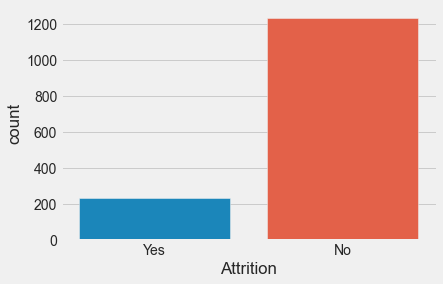

In [3]:
sns.countplot(x='Attrition', data=df)

Rimuoviamo alcune variabili per semplicità, e per quelle categoriche teniamo tutte quelle con valori unici con numerosità minore di 50.

In [4]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18',
    'StandardHours'], axis='columns', inplace=True)

categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)

df['Attrition'] = df.Attrition.astype('category').cat.codes

## Data Processing
Trasformiamo le variabili categoriche in dummy.

In [5]:
categorical_col.remove('Attrition')
data = pd.get_dummies(df, columns=categorical_col)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int8 
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyIncome                      1470 non-null   int64
 11  MonthlyRate                        1470 non-null   int64
 12  NumCompaniesWorked  

Per stimare l'albero utilzziamo la lybrary *sklearn*. Questa libreria richiede di definire la variabile target con la funzione *LabelEncoder()*.

Inoltre, è cessario scalare tutte le variabili e possibilmente standardizzarle. Qua entra in gioco la funzione *fit_transform()*.

NB: Le cateogoriali le abbiamo convertite in dummy 1/0, percui possiamo effettuare la standardizzazione con *fit_transform*

In [6]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

Ci generiamo il train set e test set con una estrazione casuale dal dataset utilizzando la funzione *train_test_split*.

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)
y = df.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4: Applying Tree & Random Forest algorithms

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## Step 1: Decision Tree Classifier
Vediamo velocemente i vari parametri da inserire:
* *criterion*: funzione che misura la qualità di uno *split*. Tra i criteri supportati vediamo il '*gini*' per valutare l'impurità e '*entropy*' per l'*information gain*;
* *splitter*: Strategia usata per scegliere lo split ad ogni nodo. Tra i criteri supportati abbiamo '*best*' per scegliere lo split migliore e '*random*' per scegliere randomicamente il miglior split;
* *max_depht*: Profondità massima dell'albero. Se non viene definito, l'albero continuerà ad aumentare fino a quando si ottengono solo nodi 'puri' (solo un valore previsivo per quel nodo) o fino a quando tutte le foglie contengono meno di '*min_samples_split*' samples;
* *min_samples_split*: Numero minimo di osservazioni per effettuare uno split all'interno di un nodo;
* *min_weight_fraction_leaf*: Valore minimo di frazione del peso (rispetto al totale dei pesi) richiesto per essere un leaf node. I campioni hanno tutti peso uguasìle  se *sample_weight* non viene definito;
* *max_features*: numero di variabili considerate quanto si cerca il miglior split;
* *max_leaf_nodes*: Numero massimo di foglie per l'albero che si vuol stimare. I nodi migliori sono definiti con un continuo ridimensionamento dell'impurità. Se non viene definito, l'albero stimerà un numero illimitato di foglie.
* *min_impurity_decrease*: Regola quanto dev'essere la riduzione di impurità per considerare uno split utile.
* *min_impurity_split*: valore soglia per un *early stopping* della crescita dell'albero. Difatto, un nodo verrà splittato solo se l'impurità è sopra la soglia, altrimenti verrà considerato come foglia.

In [9]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42) ### set.seed
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  176.0       1.0     1029.0        1029.0
_______________________________________________
Confusion Matrix: 
 [[853   0]
 [  0 176]]

Test Result:
Accuracy Score: 77.78%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.887363   0.259740  0.777778    0.573551      0.800549
recall       0.850000   0.327869  0.777778    0.588934      0.777778
f1-score     0.868280   0.289855  0.777778    0.579067      0.788271
support    380.000000  61.000000  0.777778  441.000000    441.000000
_______________________________________________
Conf

# Step 2: Decision Tree Classifier Hyperparameter tuning

Andremo ora a cercare i parametri migliori per il nostro albero. Si noti che per alcuni parametri passiamo delle liste di parametri possibili.

Nello script qua sotto andremo ad effettuare una *Cross Validation* su parametri diversi. Computazionalmente può risultare assai oneroso.

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ('gini', 'entropy'),
    'splitter': ('best', 'random'),
    'max_depth': (list(range(1,20))), 
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': list(range(1, 20)),
}

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring='accuracy',
    n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best paramters: {best_params})')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 88.82%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.906388    0.752066  0.888241     0.829227      0.879993
recall       0.964830    0.517045  0.888241     0.740938      0.888241
f1-score     0.934696    0.612795  0.888241     0.773745      0.879638
support    853.000000  176.000000  0.888241  1029.000000   1029.000000
_______________________________________________
Confusion Matrix: 
 [[823  30]
 [ 85  91]]

Test Result:
Accuracy Score: 84.35%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.887781   0.400000  0.843537    0.643890      0.820310
recall  

### Visualization of tree

In [11]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [14]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns)
features.remove("Attrition")

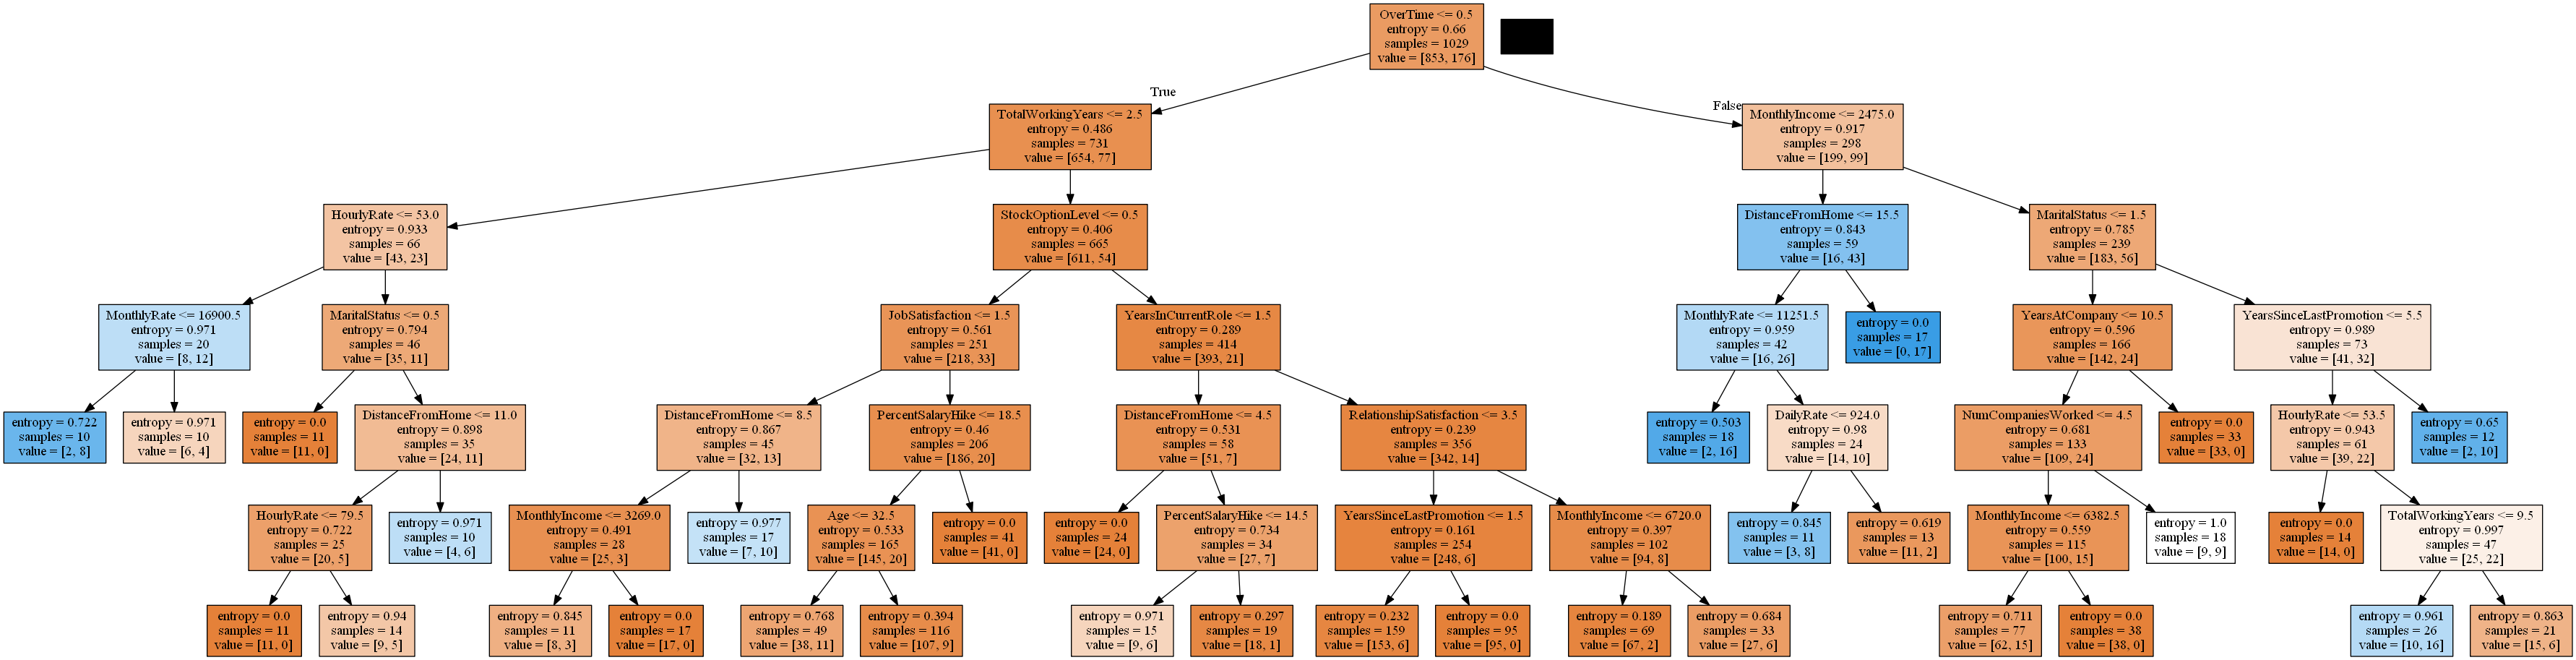

In [17]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

# Step 3: Random Forest
* **n_estimators**: The number of trees in the forest.
* **criterion**: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.
* **max_depth**: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
* **min_samples_split**: The minimum number of samples required to split an internal node.
* **min_samples_leaf**: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
* **min_weight_fraction_leaf**: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
* **max_features**: The number of features to consider when looking for the best split.
* **max_leaf_nodes**: Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
* **min_impurity_decrease**: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
* **min_impurity_split**: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
* **bootstrap**: Whether bootstrap samples are used when building trees. If False, the whole datset is used to build each tree.
oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy.

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  176.0       1.0     1029.0        1029.0
_______________________________________________
Confusion Matrix: 
 [[853   0]
 [  0 176]]

Test Result:
Accuracy Score: 87.30%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.875000   0.777778  0.873016    0.826389      0.861552
recall       0.994737   0.114754  0.873016    0.554745      0.873016
f1-score     0.931034   0.200000  0.873016    0.565517      0.829916
support    380.000000  61.000000  0.873016  441.000000    441.000000
_______________________________________________
Conf

# Part 4: Random Forest tuning

## a) Randomized Search Cross Validation

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': False})
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  176.0       1.0     1029.0        1029.0
_______________________________________________
Confusion Matrix: 
 [[853   0]
 [  0 176]]

Test Result:
Accuracy Score: 86.39%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.873832   0.538462  0.863946    0.706147      0.827443
recall       0.984211   0.114754  0.863946    0.5

**Random search** allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. We do this with **GridSearchCV**, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define.

## b) Grid Search Cross Validation

In [20]:
n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits
Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1500}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  176.0       1.0     1029.0        1029.0
_______________________________________________
Confusion Matrix: 
 [[853   0]
 [  0 176]]

Test Result:
Accuracy Score: 86.17%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.871795   0.500000  0.861678    0.685897      0.820367
recall       0.984211   0.098361  0.861678   